In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [4]:
# Suponha que você já tenha buscado o conjunto de dados Iris com fetch_ucirepo
iris_data = fetch_ucirepo(id=53)

# Convertendo os dados e os rótulos em DataFrames
df_features = pd.DataFrame(data=iris_data.data.features, columns=iris_data.metadata.features)
df_targets = pd.DataFrame(data=iris_data.data.targets, columns=['class'])  # Coloque o nome da coluna de destino conforme necessário

# Concatenando os DataFrames de recursos e rótulos
df = pd.concat([df_features, df_targets], axis=1)
# df_features['Target'] = df_targets

# Exibindo o DataFrame
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['class'])
opcoes = df['target'].unique()

print("Opções de dados na coluna 'target':")
for opcao in opcoes:
    print(opcao)

Opções de dados na coluna 'target':
0
1
2


In [6]:
opcoes_original = df['class'].unique()
opcoes_normalizada = df['target'].unique()

# Crie um novo DataFrame com as opções combinadas
df_opcoes_target = pd.DataFrame({'Original': opcoes_original, 'Normalizada': opcoes_normalizada})
print(df_opcoes_target)

          Original  Normalizada
0      Iris-setosa            0
1  Iris-versicolor            1
2   Iris-virginica            2


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

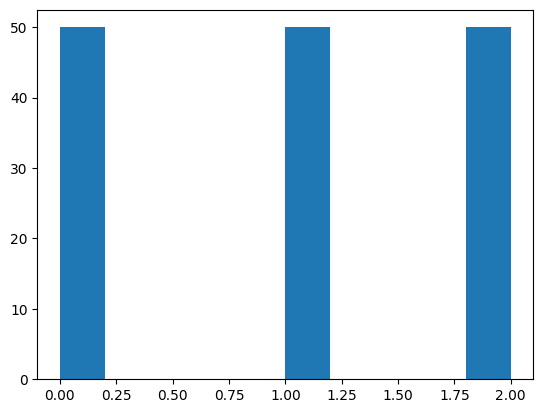

In [7]:
plt.hist(df["target"])